In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models

In [2]:
#load fashin mnist dataset
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(training_images.shape)

#reshape
training_images = training_images.reshape(training_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)
print(training_images.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               20

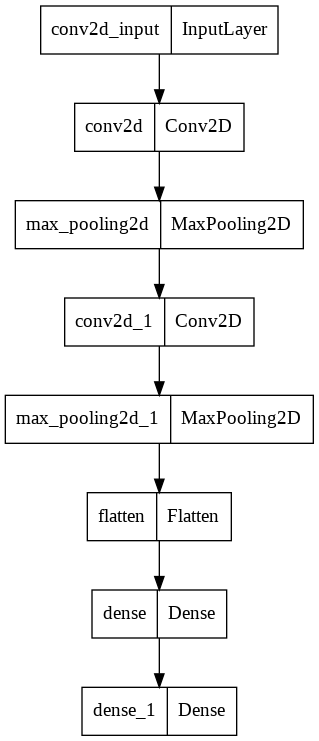

In [3]:
def get_model_cnn():
  model_cnn = tf.keras.models.Sequential(name="cnn_model")
  model_cnn.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
  model_cnn.add(keras.layers.MaxPooling2D(2,2))
  model_cnn.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
  model_cnn.add(keras.layers.MaxPooling2D((2,2)))
  model_cnn.add(tf.keras.layers.Flatten())
  model_cnn.add(tf.keras.layers.Dense(128, activation=keras.activations.relu))
  model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

  model_cnn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

  return model_cnn

model_cnn = get_model_cnn()
model_cnn.summary()
plot_model(model_cnn, to_file="model_fc.png")

In [4]:
history =model_cnn.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 5ms/step - loss: 0.5759 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3343 - accuracy: 0.8760
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2943 - accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2676 - accuracy: 0.8990
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2494 - accuracy: 0.9071
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2299 - accuracy: 0.9130
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2161 - accuracy: 0.9197
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2010 - accuracy: 0.9232
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1867 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

##Generating layer output visualizations

###Keract is a very simple API, that generate output visualizations for layers

In [16]:
!pip install keract

conv2d_input (1, 28, 28, 1) 


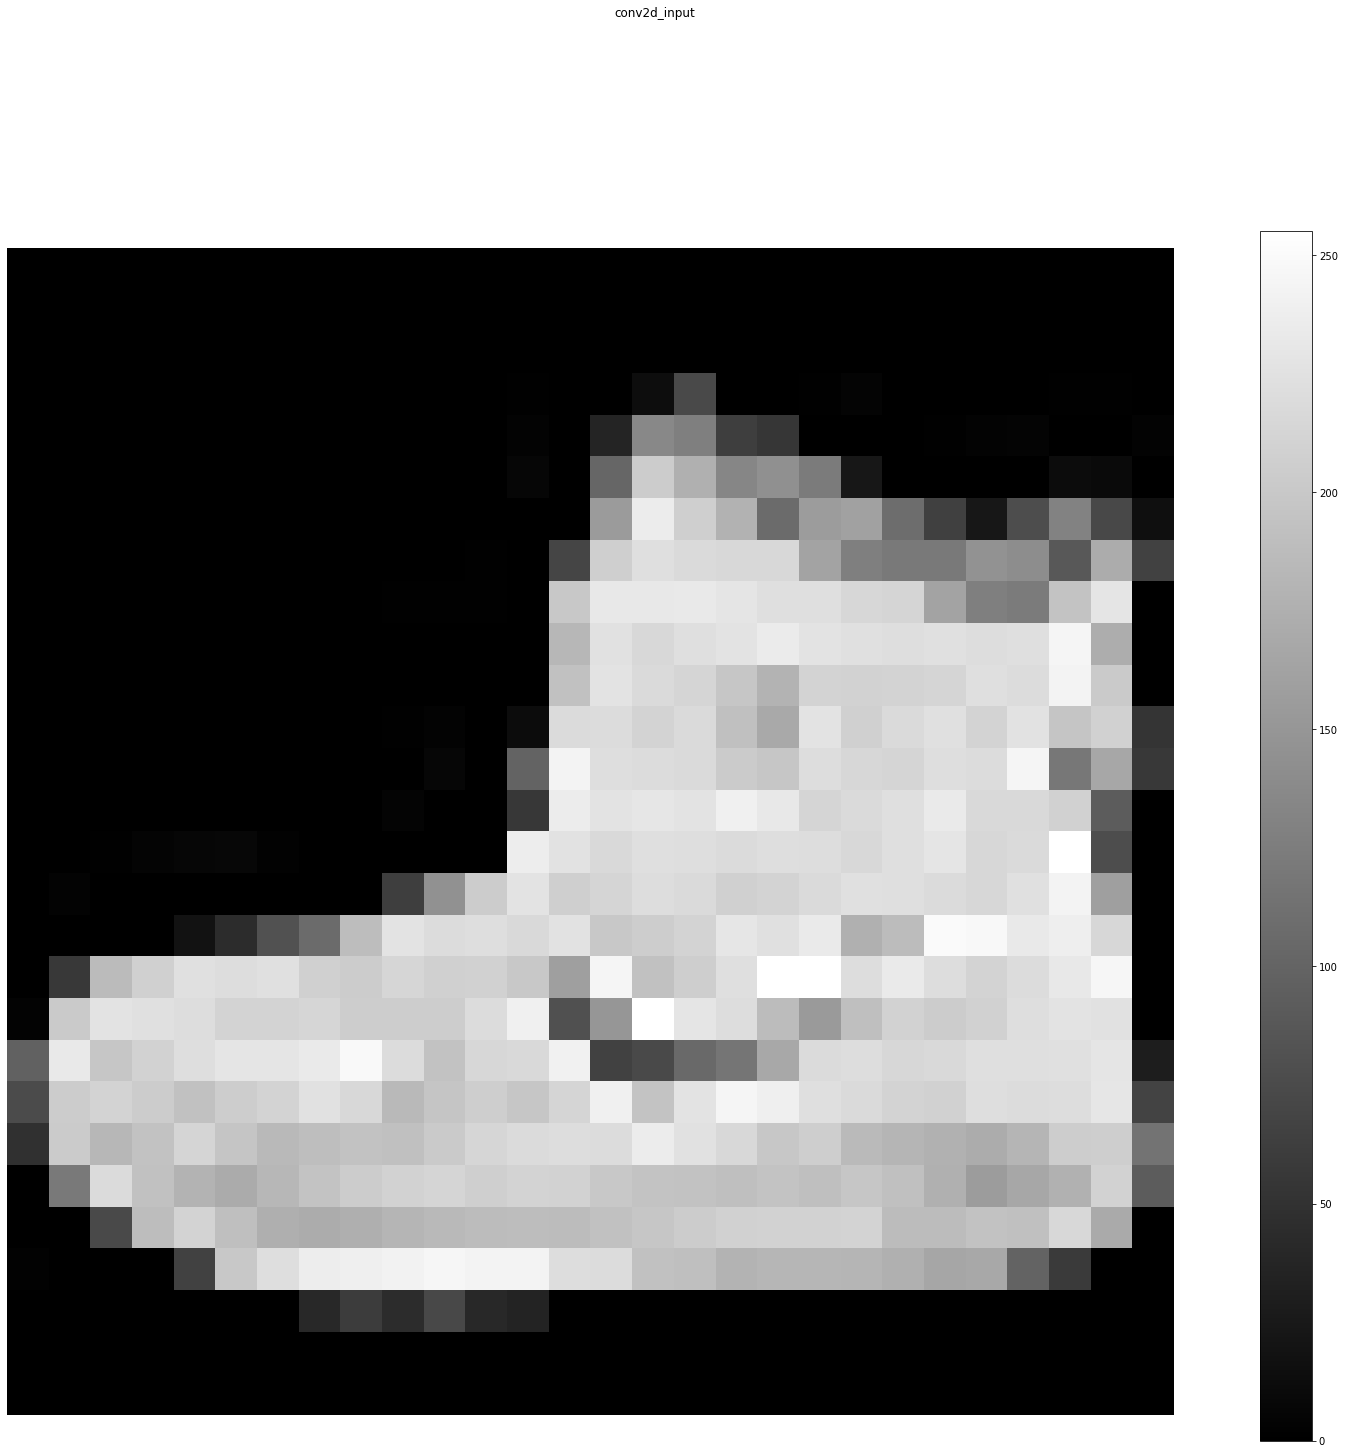

conv2d (1, 26, 26, 32) 


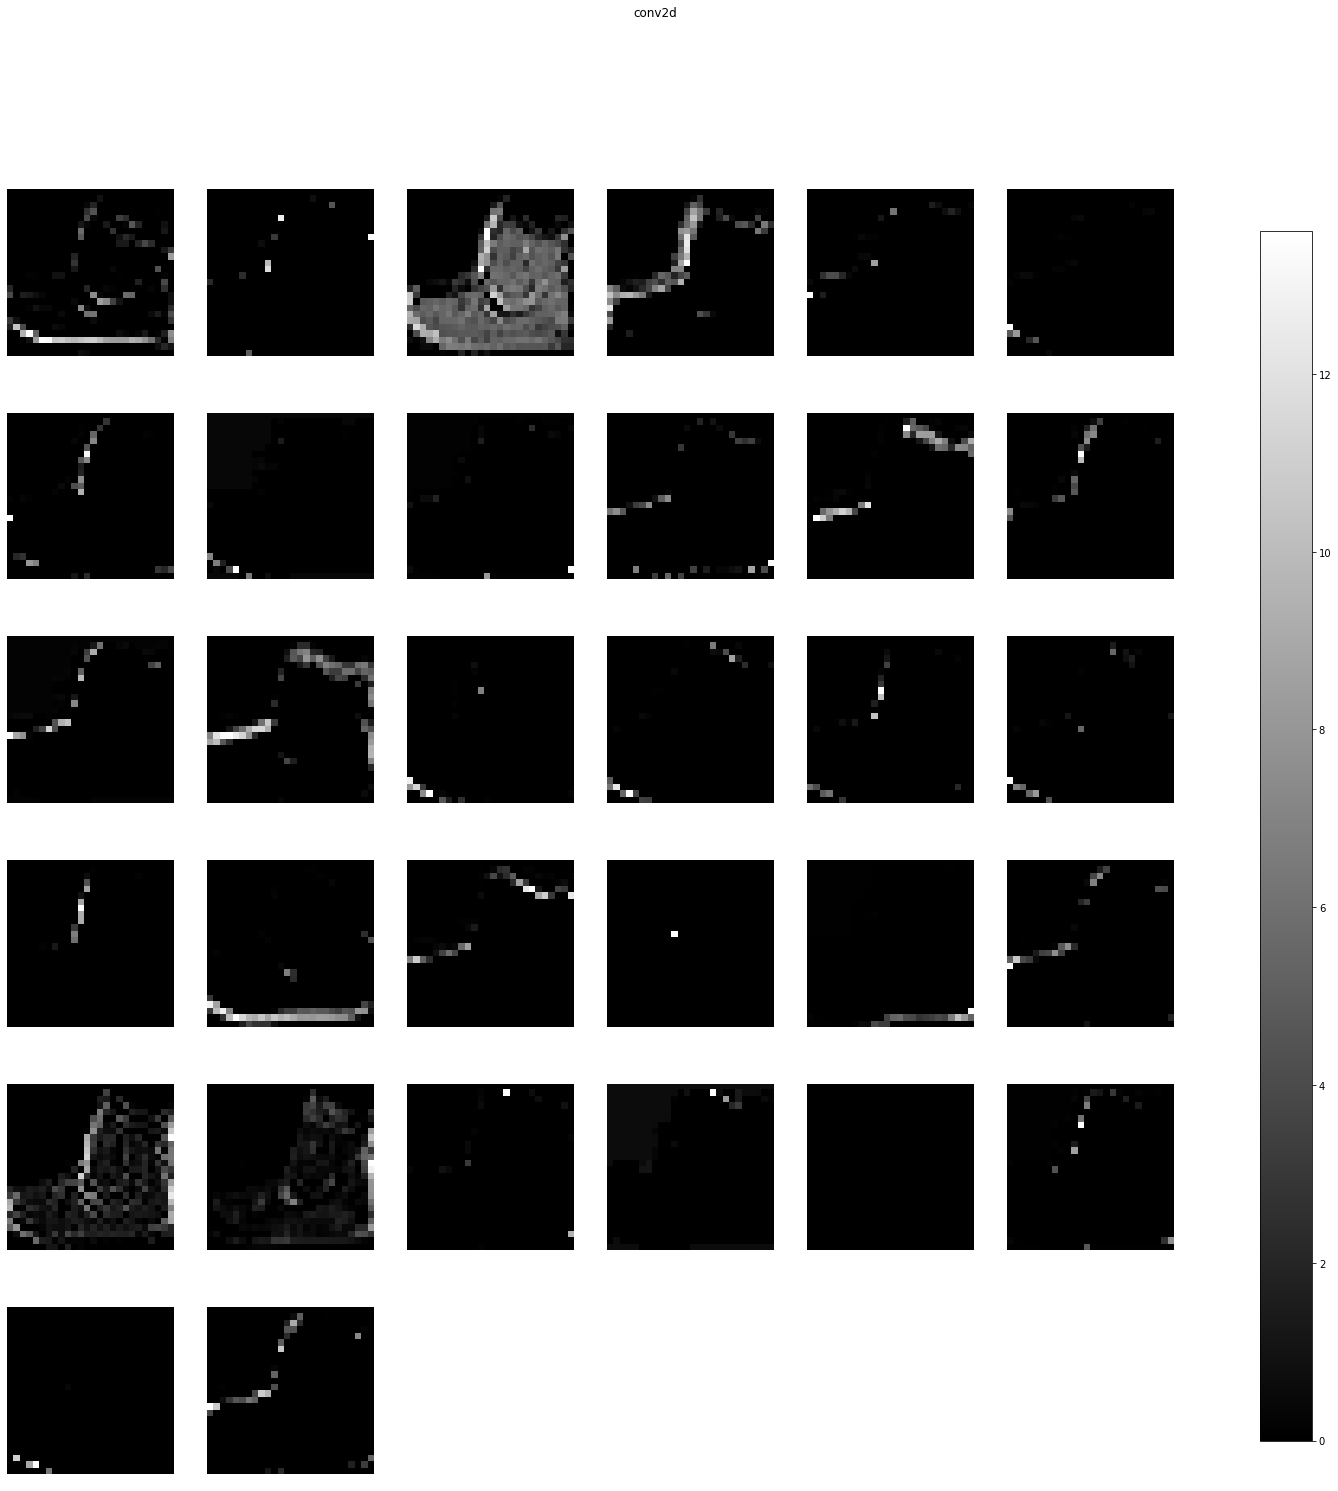

max_pooling2d (1, 13, 13, 32) 


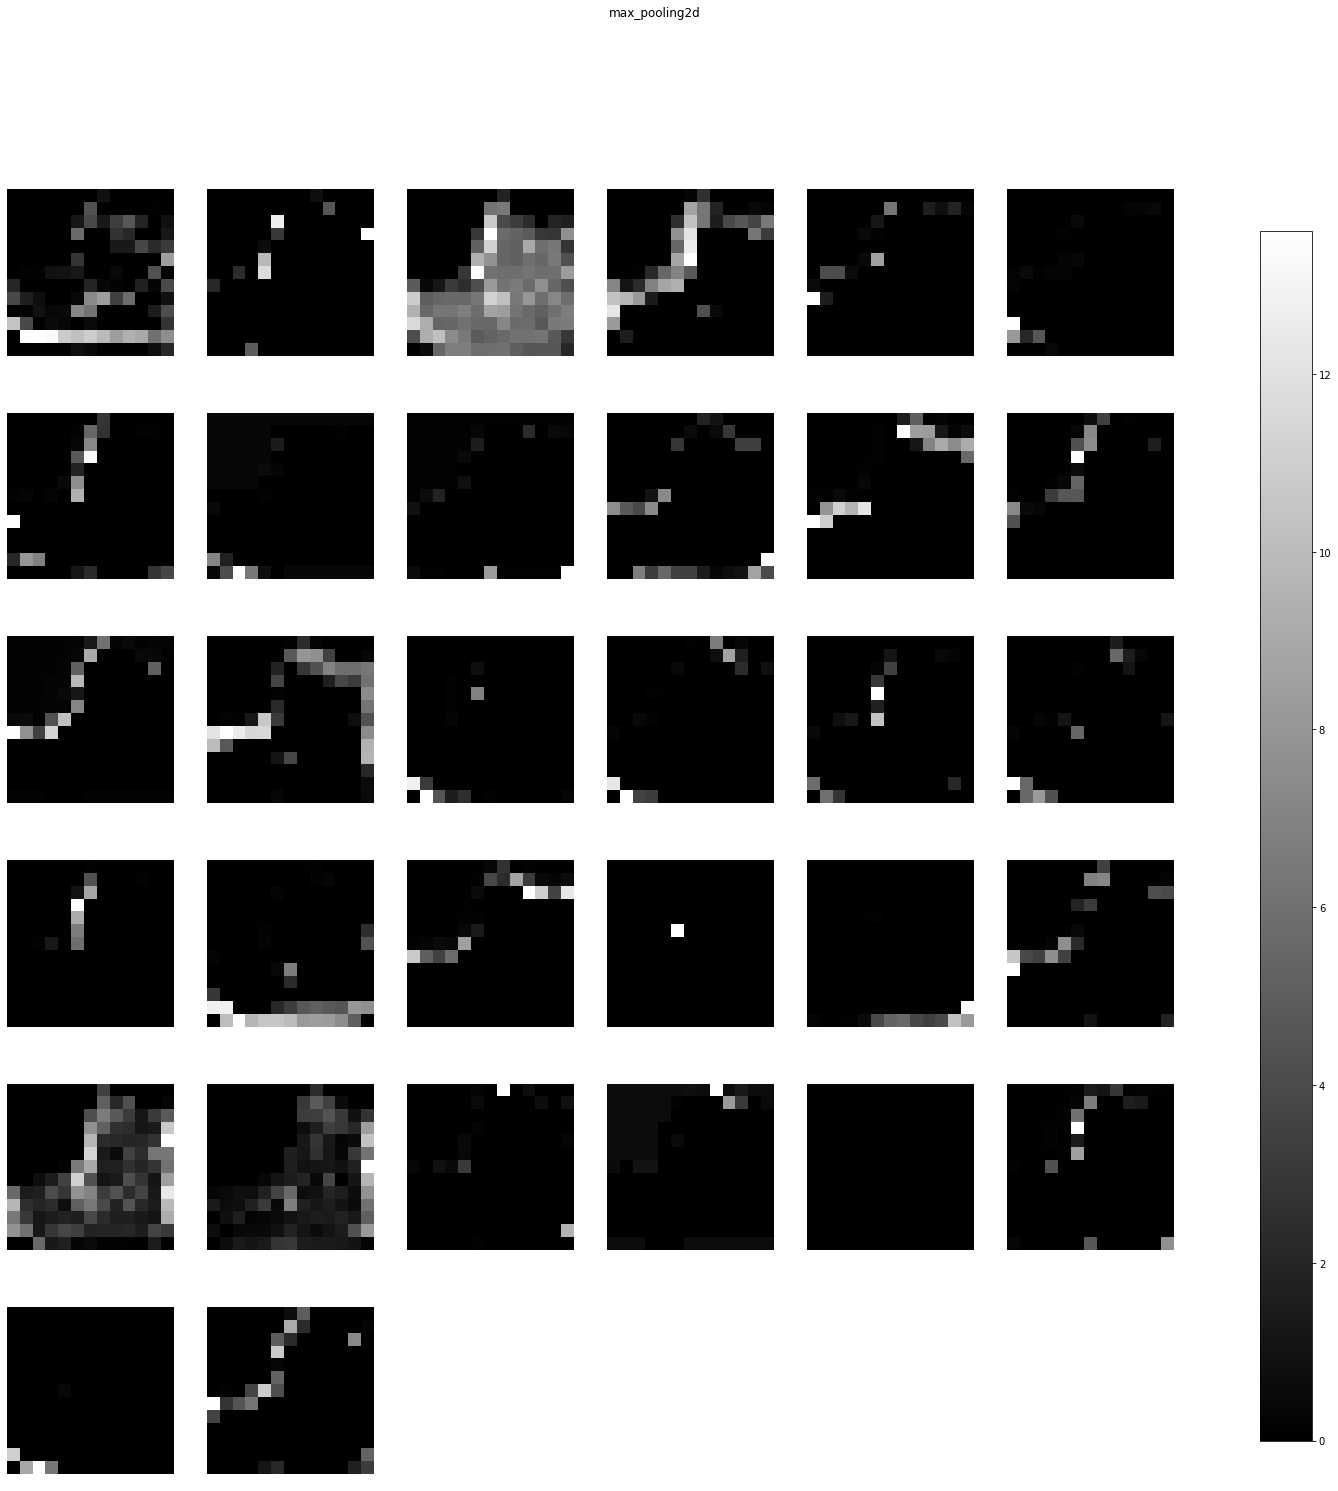

conv2d_1 (1, 11, 11, 64) 


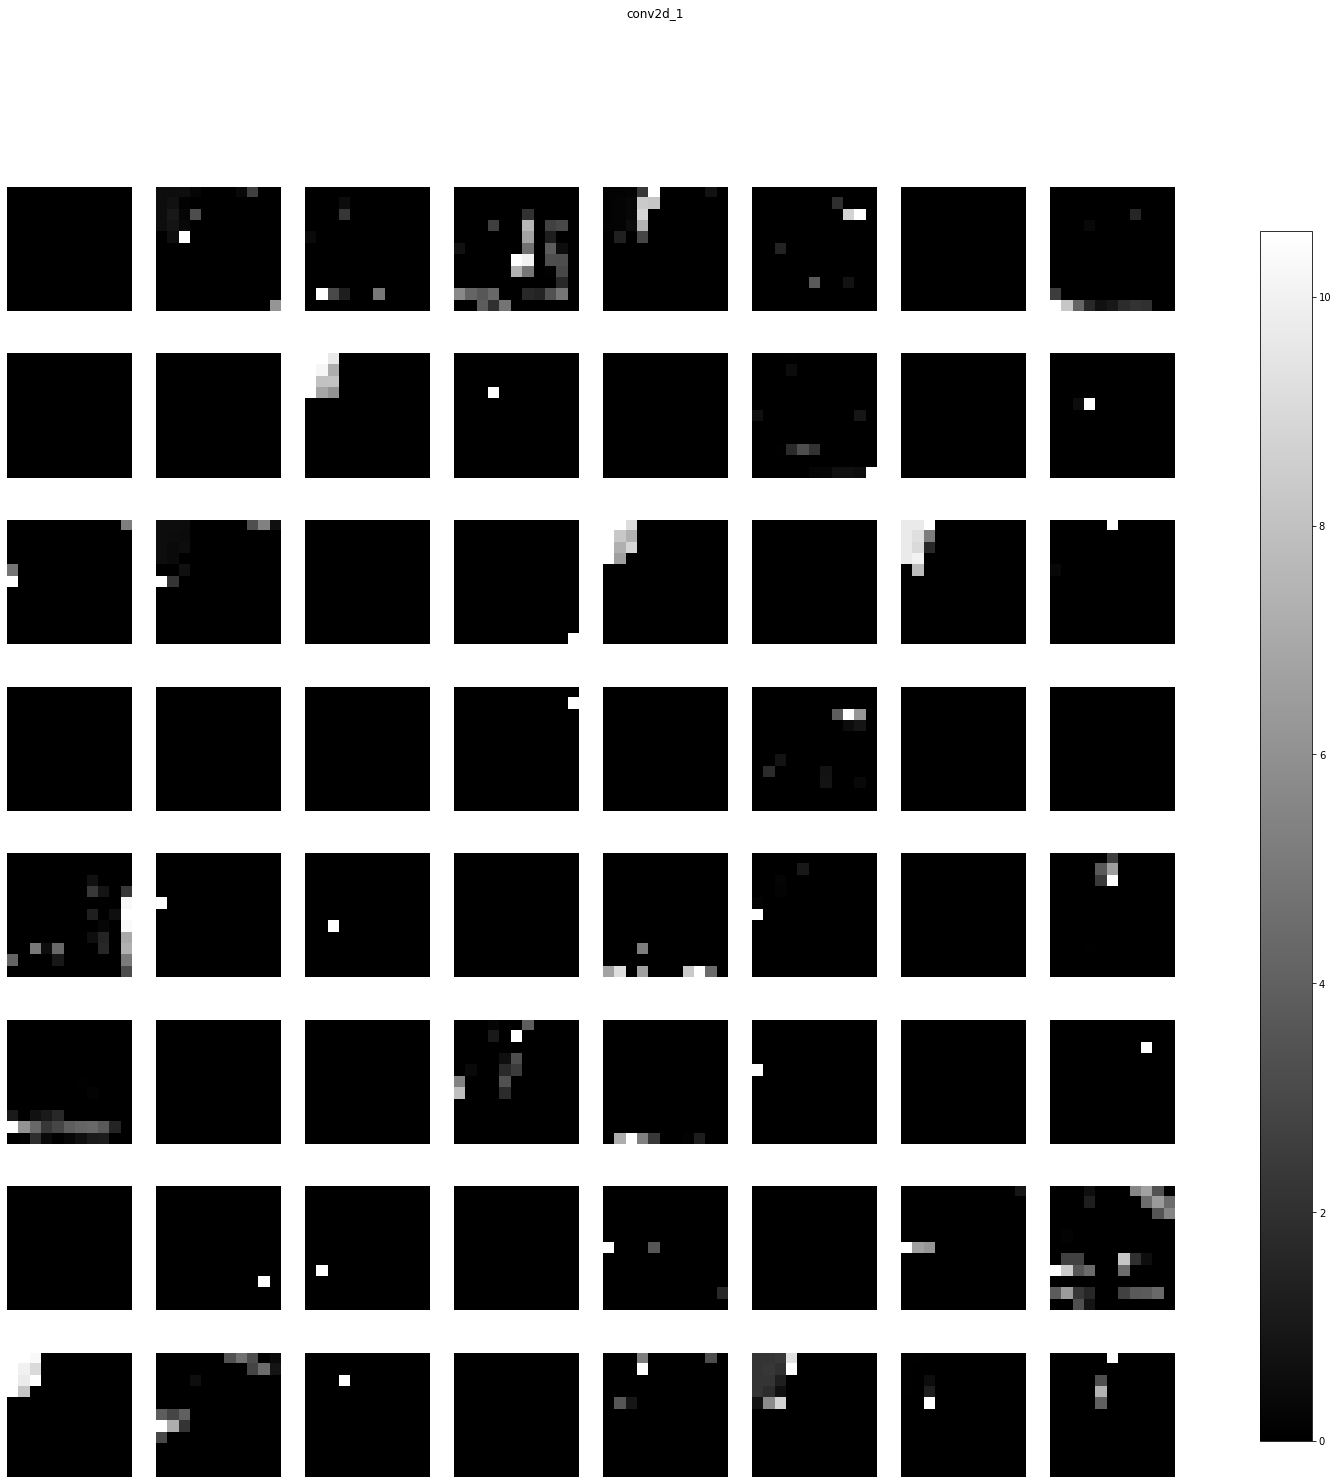

max_pooling2d_1 (1, 5, 5, 64) 


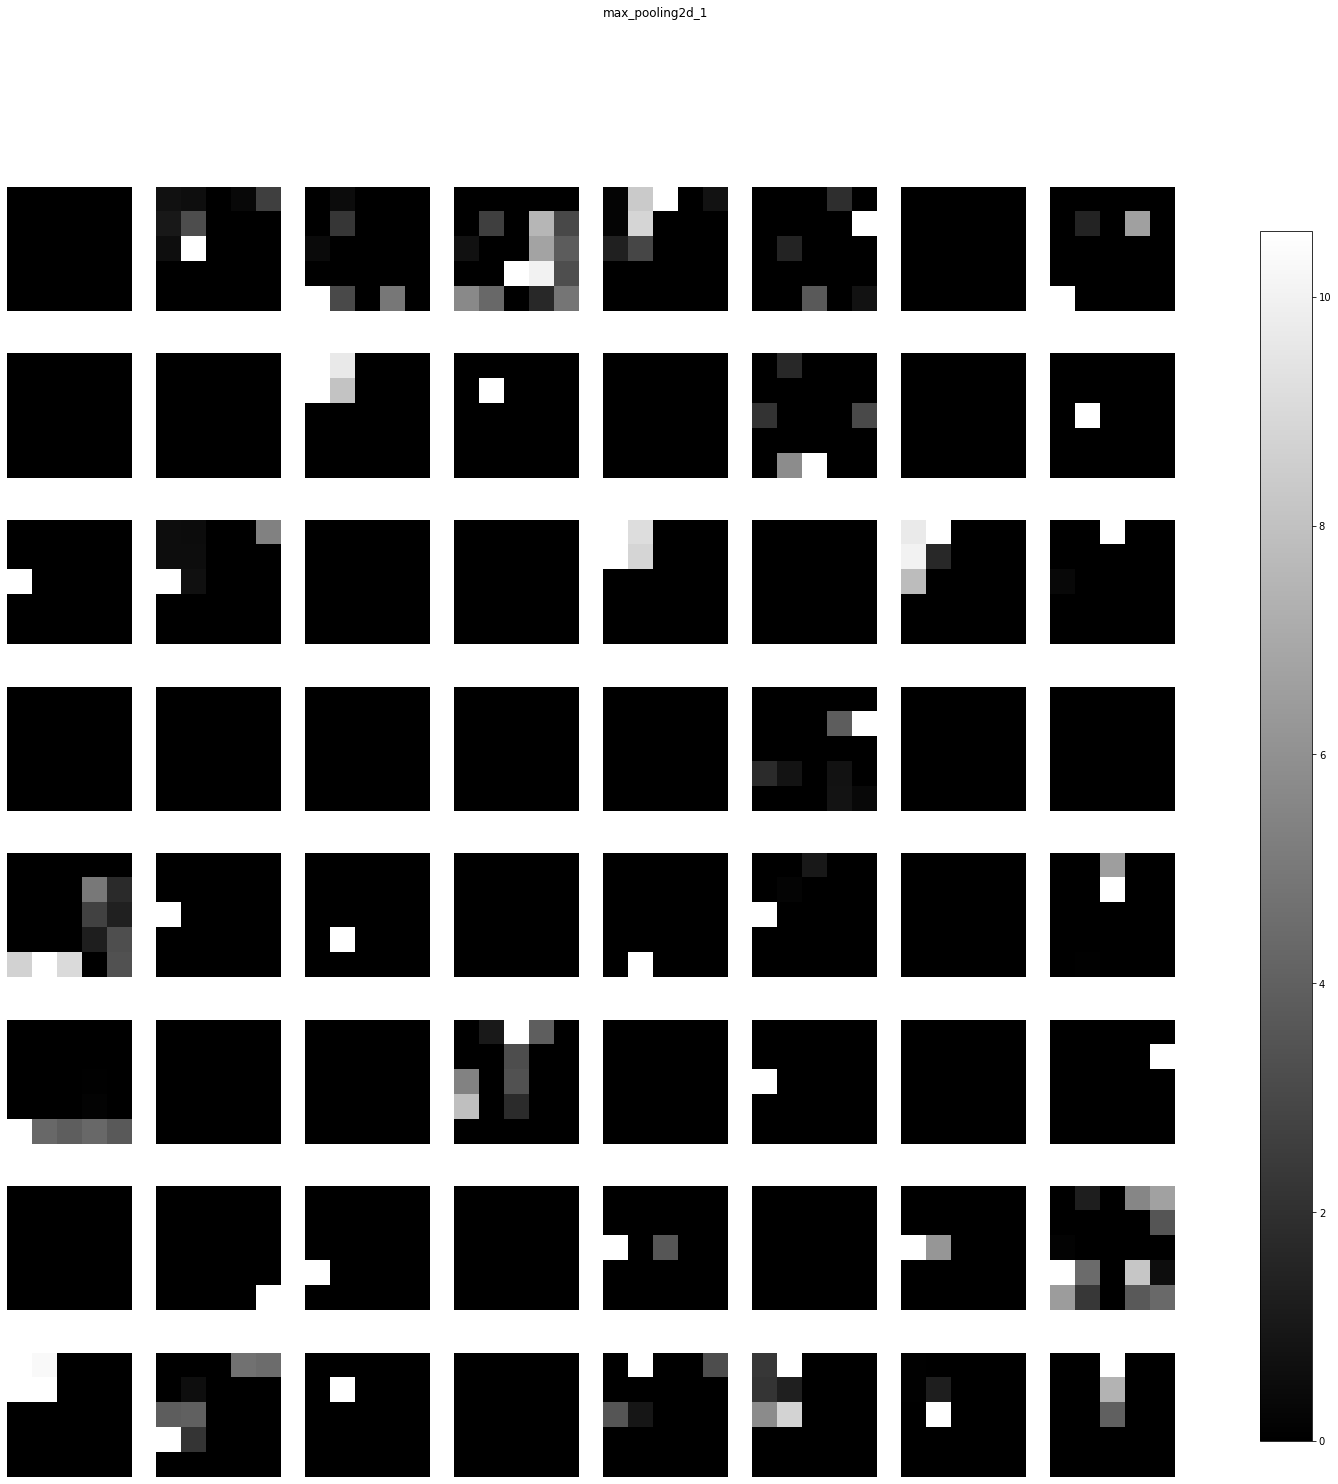

flatten (1, 1600) 


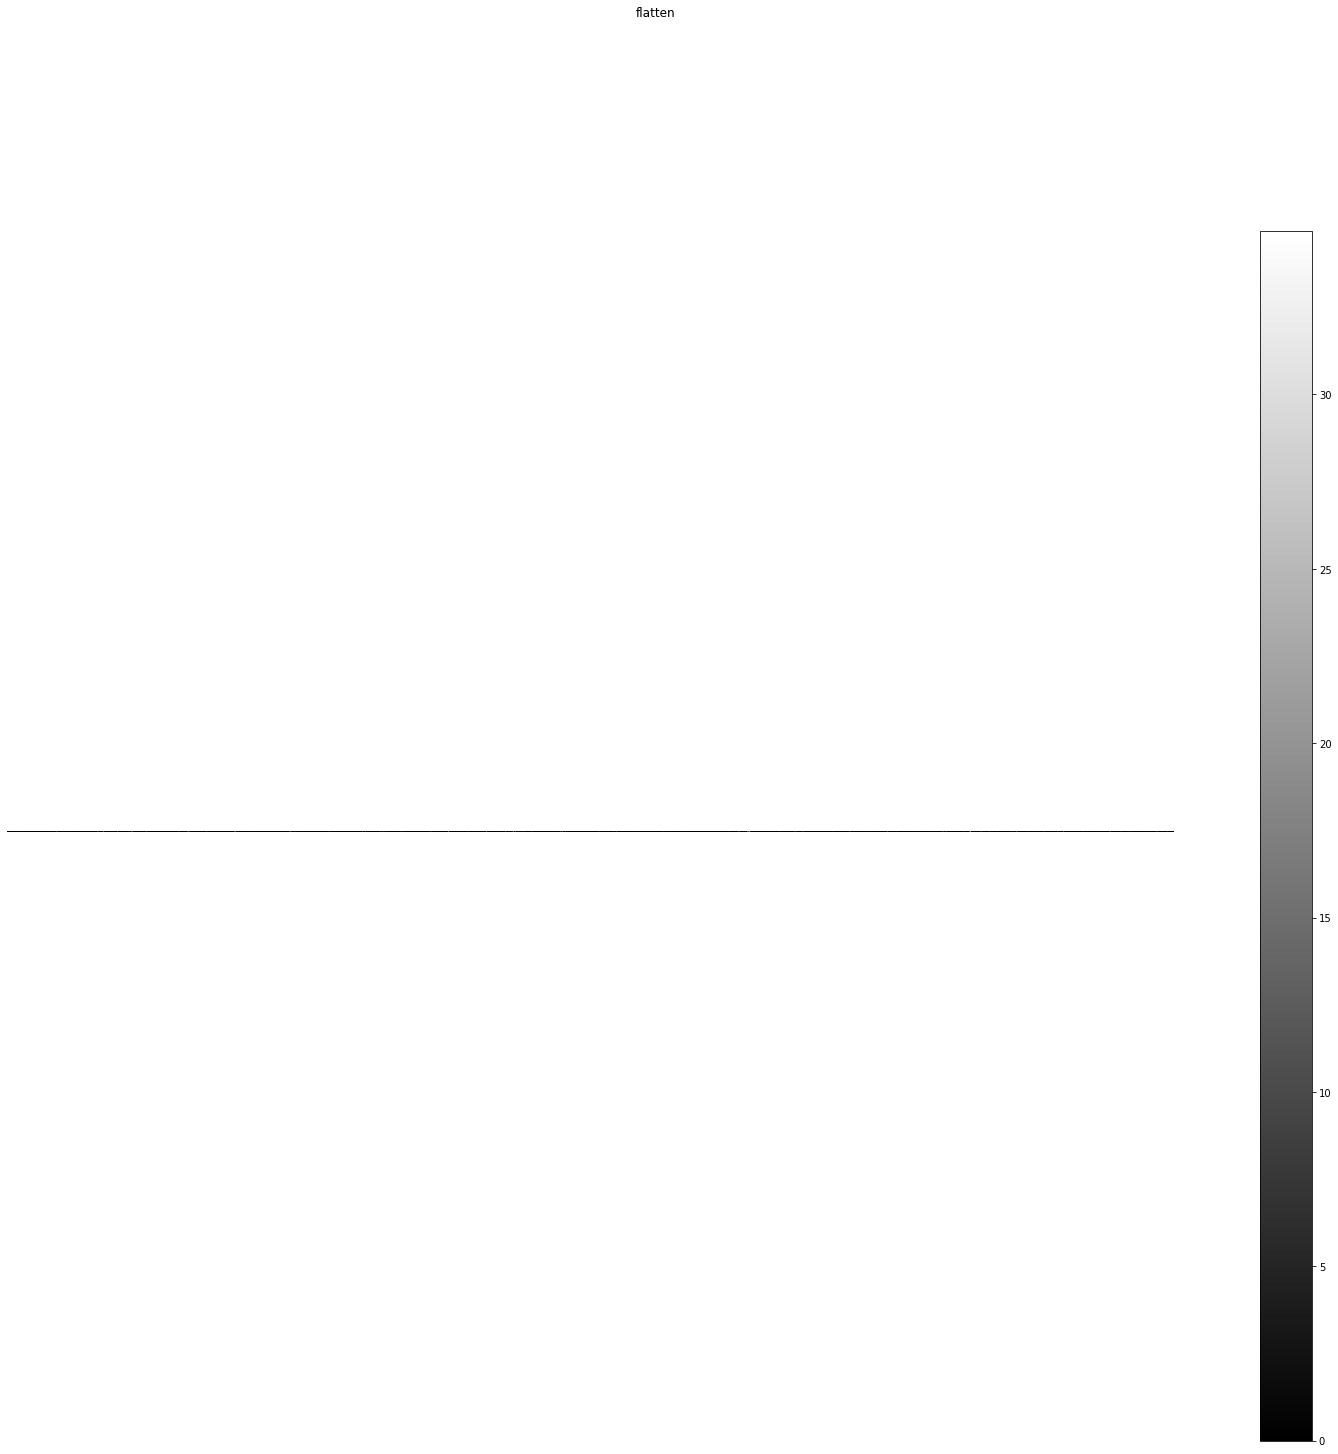

dense (1, 128) 


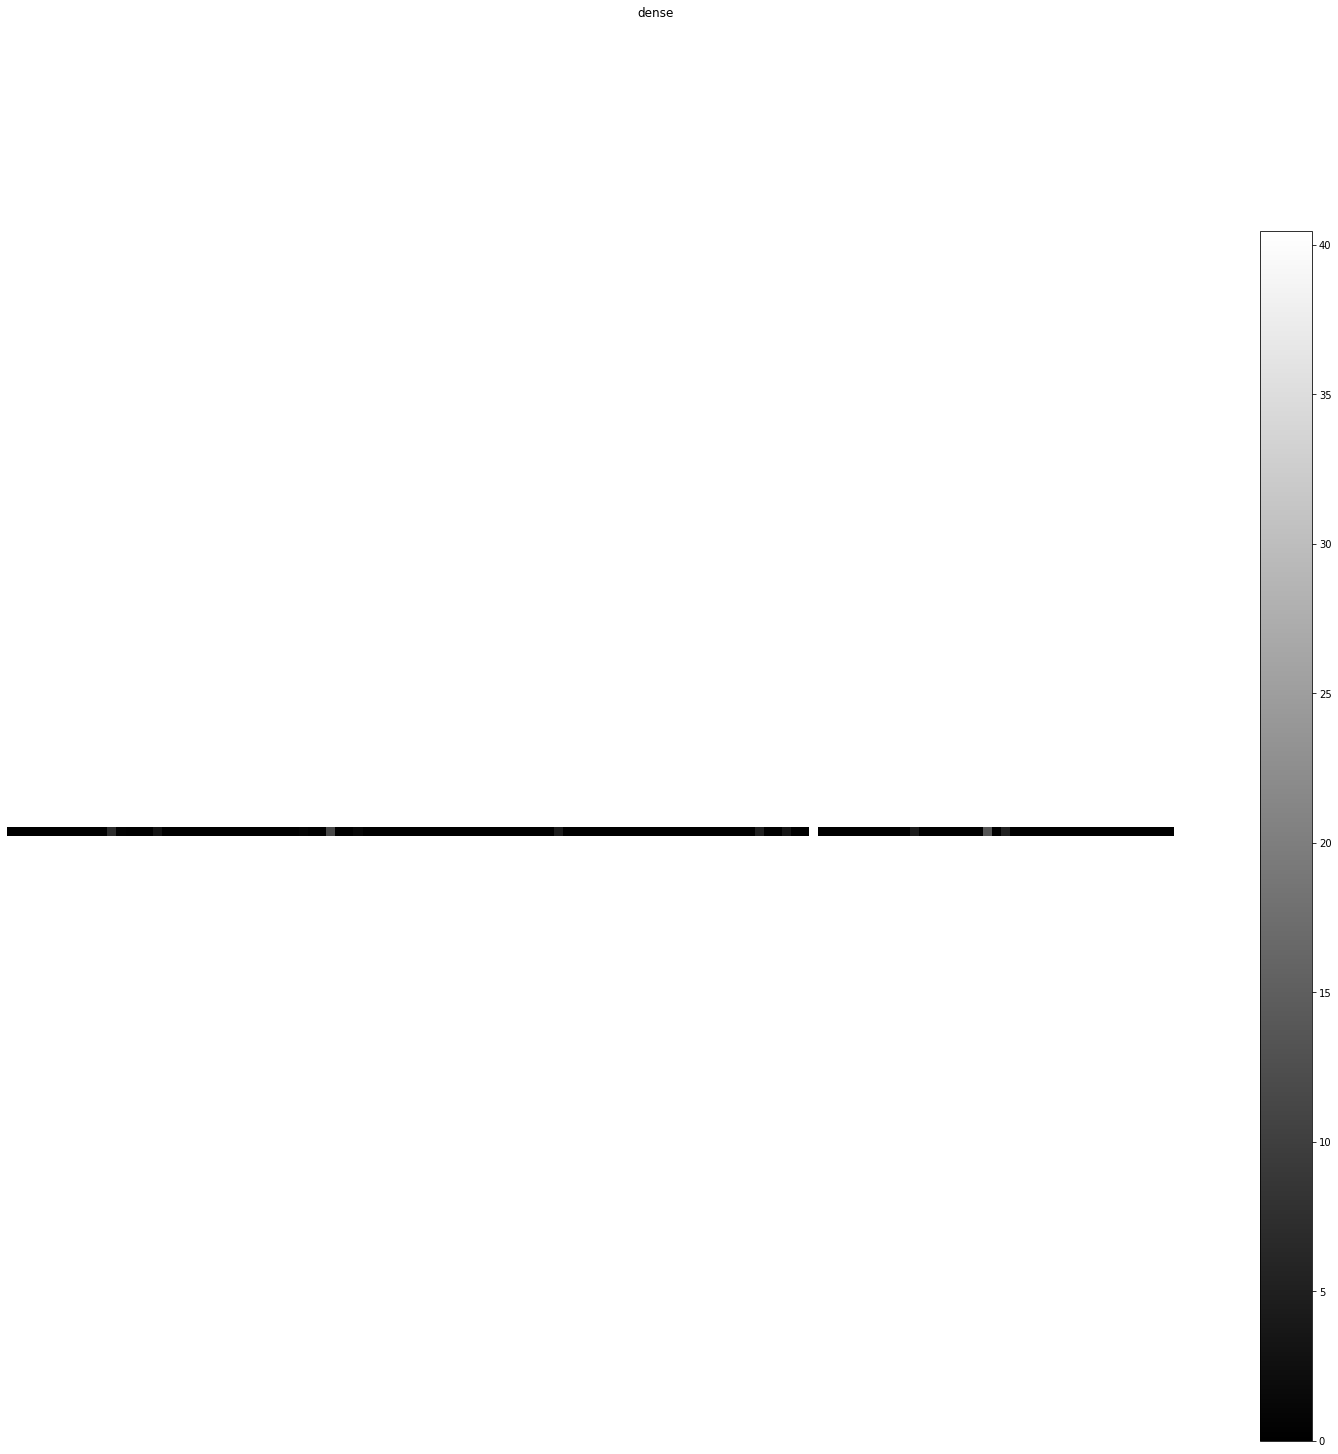

dense_1 (1, 10) 


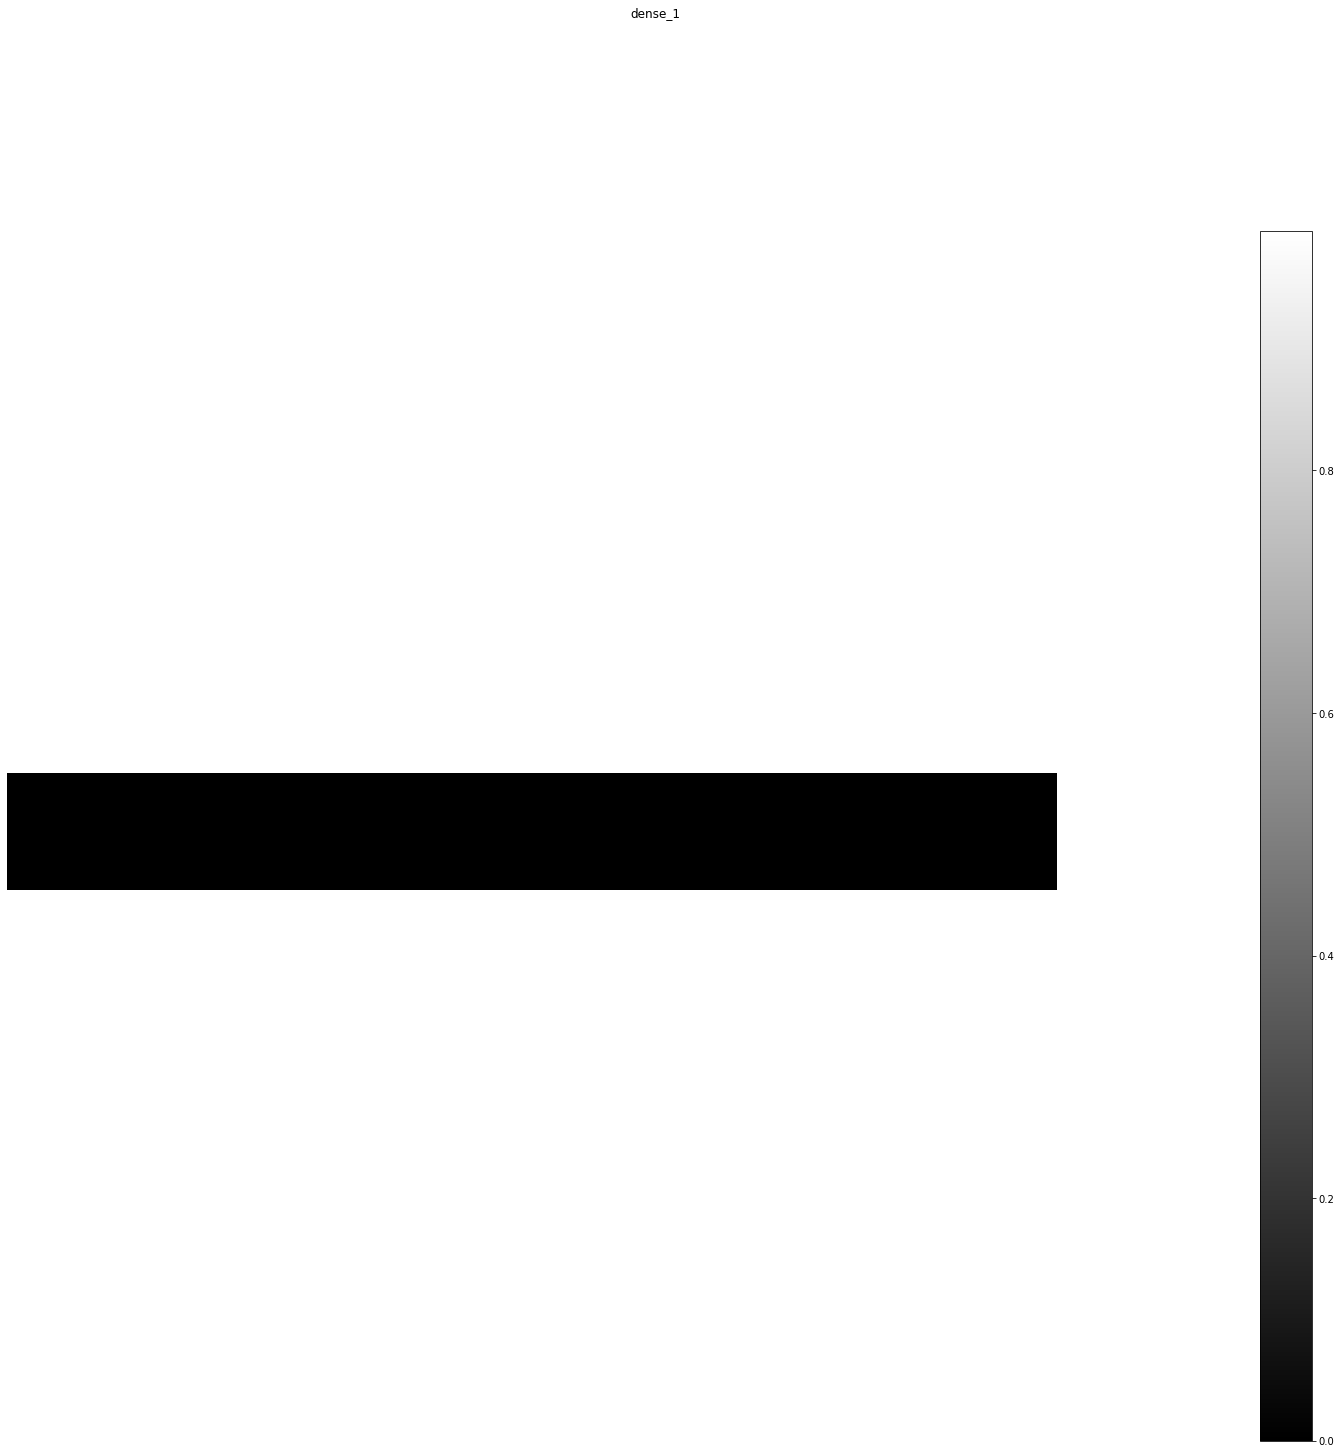

In [21]:
from keract import get_activations, display_activations
keract_inputs = training_images[:1]
keract_targets = training_labels[:1]
activations = get_activations(model_cnn, keract_inputs)
display_activations(activations, cmap="gray", save=False)